In [21]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math


ادرس دهی فایل های هیستوی با فرمت csv

In [22]:
file_list = [r'C:\Users\delta2794900\Downloads\1487129.positions (3).csv']

خواندن فایل ها و مرتب و تمیز کاری فایل ها و تبدیل بازدهی و ضرر ها و کمیستون و سواپ به درصد 

In [23]:
cancelled_order=[]
cancel_order=cancelled_order
with open('C:/Users/delta2794900/Documents/analyses.one/test3.csv', 'w', newline='') as f_out:
    writer = csv.writer(f_out)

    b= 0 
    for file_name in file_list:
        b =b+1
        c = 0
        balance = 0
        
        
        bag = 0
        with open(file_name) as f_in:
            reader = list(csv.reader(f_in, delimiter=';'))
            readera = reversed(reader)
            for i in readera:
                bag = bag + 1
                #print(b,bag,i)

                if c == 0 :
                    balance = i[-1].replace(' ','')
                    #print(balance)
                    c = c +1
                    continue

                if i[1] == 'Balance':
                    bal = i[-1].replace(' ','')
                    bal = float(bal)
                    balance =float(balance) 
                    balance = bal + balance
                    #print(balance)
                    continue
                                      
                    
                if i[1] == 'Type':
                    continue                    
                
                
                if i[-1] == 'cancelled':
                    cancelled_order.append(i)
                    continue


                balance  = float(balance)
                #print(b,balance)

                if len(i) == 11:
                    i.insert(5, 'notsl')
                    i.insert(6, 'nottp')
                    i.append('notcomment ')
                    
                if len(i) == 13:
                    i.insert(7,'0')
                    


                if i[-2] == '[sl]':
                    prof  = str(i[-3])
                    swap  = str(i[-4])
                    com   = str(i[-5])
                    prof  = i[-3].replace(' ','')
                    swap  = i[-4].replace(' ','')
                    com   = i[-5].replace(' ','')
                    prof  = float(prof)
                    if swap == '' :
                        swap = 0
                    swap  = float(swap)
                    if com == '' :
                        com = 0
                    com   = float(com)
                    balance = balance + prof + swap
                    prof  = prof * 100 / balance                    
                    swap  = swap * 100 / balance
                    com   = com * 100 / balance
                    i[-3] = prof
                    i[-4] = swap
                    i[-5] = com
                    writer.writerow(i)
                    continue
                    
                if i[-2] == '[tp]':
                    prof  = str(i[-3])
                    swap  = str(i[-4])
                    com   = str(i[-5])                    
                    prof  = i[-3].replace(' ','')
                    swap  = i[-4].replace(' ','')
                    com   = i[-5].replace(' ','')
                    prof  = float(prof)
                    if swap == '' :
                        swap = 0
                    swap  = float(swap)
                    if com == '' :
                        com = 0                    
                    com   = float(com)
                    print(balance)
                    balance = balance + prof + swap
                    prof  = prof * 100 / balance
                    swap  = swap * 100 / balance
                    com   = com * 100 / balance
                    i[-3] = prof
                    i[-4] = swap
                    i[-5] = com
                    writer.writerow(i)
                    continue
                    
                if i[-2] != 'cancelled' :
                    prof  = str(i[-2])
                    swap  = str(i[-3])
                    com   = str(i[-4])                    
                    prof  = i[-2].replace(' ','')
                    swap  = i[-3].replace(' ','')
                    com   = i[-4].replace(' ','')
                    prof  = float(prof)
                    if swap == '' :
                        swap = 0
                    swap  = float(swap)
                    if com == '' :
                        com = 0                    
                    com   = float(com)
                    print(balance)
                    balance = balance + prof + swap
                    prof  = prof * 100 / balance
                    swap  = swap * 100 / balance
                    com   = com * 100 / balance
                    i[-2] = prof
                    i[-3] = swap
                    i[-4] = com
                    writer.writerow(i)
                    continue
                


203.37
206.21
205.25
208.13
207.21
210.91
214.51
218.26
218.76
215.31
224.61
224.99
227.29000000000002
234.79000000000002
233.69000000000003
235.69000000000003
241.59000000000003
236.39000000000004
255.19000000000005
258.51000000000005
263.41
263.63000000000005
264.14000000000004
259.74000000000007
270.94000000000005
277.14000000000004
277.33000000000004
277.62
275.45000000000005
281.40000000000003
282.87
287.17
284.56
281.86
283.39
280.12
281.54
282.64000000000004
282.97
284.32000000000005
284.47
284.95000000000005
283.39000000000004
282.77000000000004
282.96000000000004
283.22
283.61
283.90000000000003
288.1
288.48
295.38
299.38
303.58
304.0
310.4
311.9
311.98999999999995
312.98999999999995
313.48999999999995
318.18999999999994
312.18999999999994
328.5899999999999
328.7699999999999
328.9099999999999
328.3299999999999
324.3299999999999
335.92999999999995
338.8299999999999
339.2199999999999
339.5499999999999
343.2099999999999
348.44999999999993
348.7299999999999
348.8399999999999
344.0

نام گذاری ستون ها و خواندن فایل با ماژول pandas

In [24]:


colname = ['Time','Type','Volume','Symbol','Price','S/L','T/P','Volume1','Time1','Price1','Commission','Swap','Profit','Comment']
df = pd.read_csv('C:/Users/delta2794900/Documents/analyses.one/test3.csv', names = colname)



تراکنش سطر ها را به ترتیب تاریخ چیدن 

In [25]:

df['Time'] = pd.to_datetime(df['Time'], format='%Y.%m.%d %H:%M:%S')
df = df.sort_values(by='Time')
df.to_csv("C:/Users/delta2794900/Documents/analyses.one/sorted,test3.csv", index=False, header=None)

سود و ضرر ها به صورت لگاریتمی محاسبه شده (مقدار جمع سود ها به صورت سود مرکب حساب شده و ضرر ها نیز به صورت درصدی از کل سود کم میشوند) 

In [26]:
wintrade = []
losstrade = []
win_p=0
loss_p =0
trade_number =0





# خواندن فایل csv و ذخیره داده ها در لیست data
with open("C:/Users/delta2794900/Documents/analyses.one/sorted,test3.csv") as f:
    reader = csv.reader(f)
    data = []
    for row in reader:
        sod = float(row[-2])
        com = float(row[-4])
        data.append(sod + com)
        trade_number = trade_number+1

# محاسبه سود و زیان مرکب هر معامله و ذخیره آنها در لیست returns
returns = []
cumulative_returns = []
for i, d in enumerate(data):
    if i == 0:
        returns.append(d)
        cumulative_returns.append(d)
    else:
        if cumulative_returns[-1] > 0:
            r = d / 100 * (cumulative_returns[-1] + 100)
            returns.append(r)
            cumulative_returns.append(r + cumulative_returns[-1])
        elif cumulative_returns[-1] < -100:
            print('call margin')
            break
        else:
            r = d / 100 * (100 + cumulative_returns[-1])
            returns.append(r)
            cumulative_returns.append(r + cumulative_returns[-1])


newcsv = pd.read_csv("C:/Users/delta2794900/Documents/analyses.one/sorted,test3.csv")

newcsv['logprofit'] = pd.Series(cumulative_returns)

# حذف نام ستون 'logprofit'
column_names = newcsv.columns.tolist()
column_names[-1] = '0'
newcsv.columns = column_names

newcsv.to_csv('newcsv.csv', index=False)



In [27]:
newcsv.head()


,2021-07-23 11:34:05,Buy,0.02,EURUSD,1.17856,notsl,nottp,0.02.1,2021.07.23 15:59:16,1.17808,-0.0682095006090134,0.0,-0.4677222898903775,notcomment,0
0,2021-07-23 12:00:15,Buy,0.04,EURUSD,1.17737,notsl,nottp,0.04,2021.07.23 15:59:15,1.17808,-0.135784,0.0,1.377237,notcomment,-0.535932
1,2021-07-23 14:31:28,Sell,0.02,EURUSD,1.17576,notsl,nottp,0.02,2021.07.23 16:51:10,1.17622,-0.067564,0.0,-0.443994,notcomment,0.698868
2,2021-07-23 15:17:00,Sell,0.04,EURUSD,1.17697,notsl,nottp,0.04,2021.07.23 16:51:04,1.17625,-0.134531,0.0,1.383751,notcomment,0.183734
3,2021-07-26 10:23:43,Buy,0.05,EURUSD,1.17906,notsl,nottp,0.05,2021.07.26 10:24:30,1.17980,-0.170689,0.0,1.754303,notcomment,1.435249
4,2021-07-26 12:15:15,Buy,0.05,EURUSD,1.17914,notsl,nottp,0.05,2021.07.26 12:54:25,1.17986,-0.167824,0.0,1.678243,notcomment,3.041591


In [28]:
soton = ['dateopen', 'type', 'vol1','symbol', 'priceopen', 'sl', 'tp', 'vol2', 'dateclose', 'priceclose','com','swap','logprof','comment', 'morakab.proft' ]

newcsv.columns= soton

In [29]:
newcsv['dateopen'] = pd.to_datetime(newcsv['dateopen'])
newcsv['dateclose'] = pd.to_datetime(newcsv['dateclose'])

In [30]:
newcsv['timetrade']= (newcsv['dateclose']-newcsv['dateopen']).dt.total_seconds()


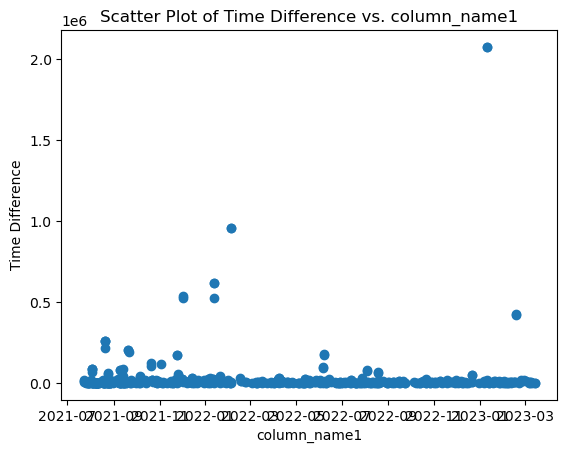

In [31]:
# رسم نمودار scatter
plt.scatter(newcsv['dateopen'], newcsv['timetrade'])
plt.xlabel('column_name1')
plt.ylabel('Time Difference')
plt.title('Scatter Plot of Time Difference vs. column_name1')
plt.show()

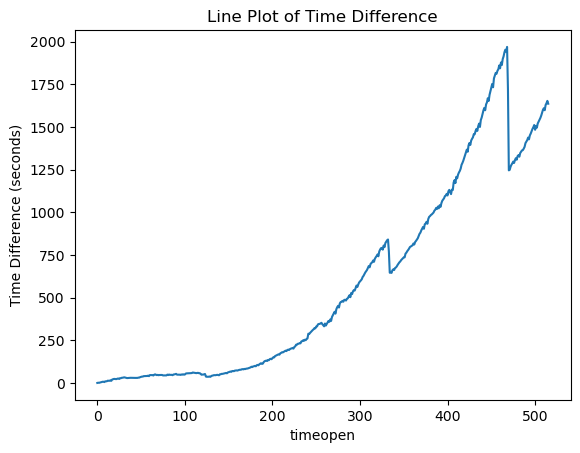

In [32]:
# رسم نمودار خطی بر اساس ستون time_difference
plt.plot(newcsv['morakab.proft'])
plt.xlabel('timeopen')
plt.ylabel('Time Difference (seconds)')
plt.title('Line Plot of Time Difference')
plt.show()

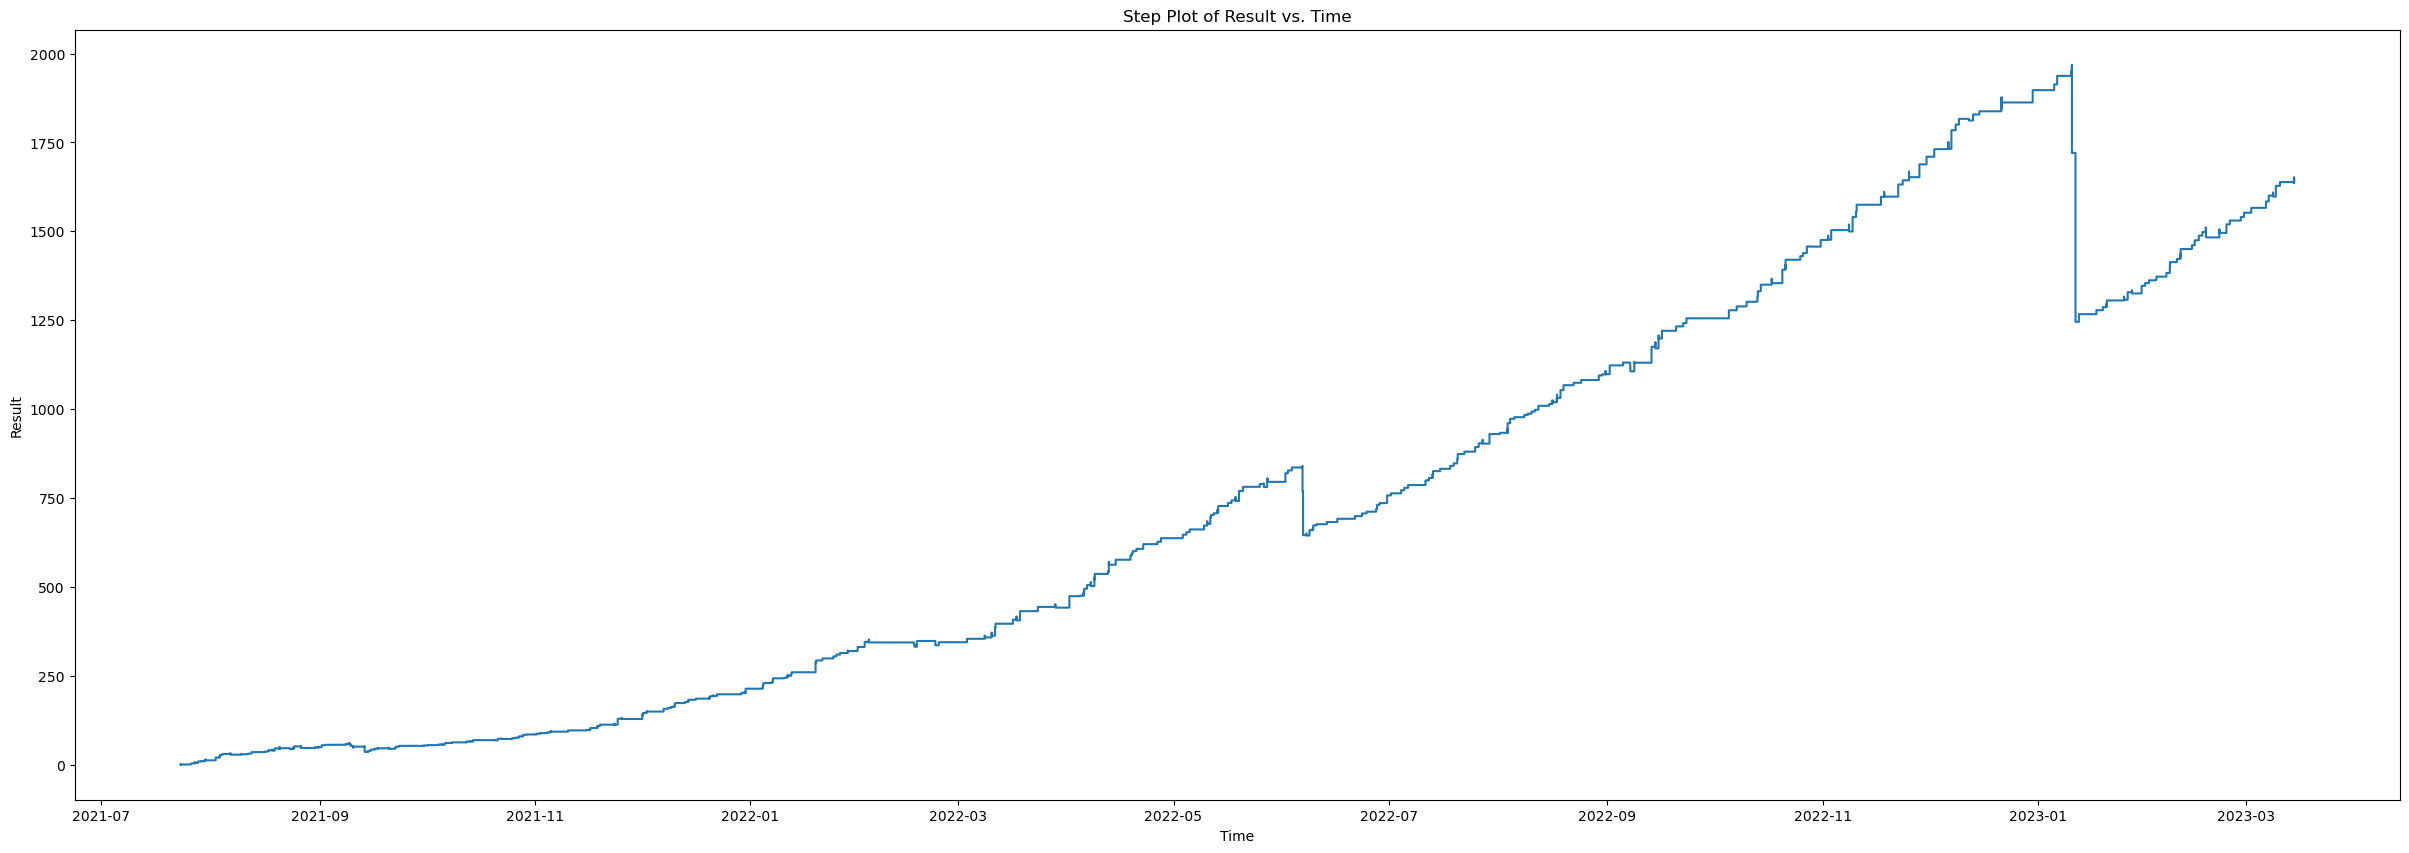

In [33]:
plt.figure(figsize=(30, 10))

plt.step(newcsv['dateopen'], newcsv['morakab.proft'], where='post')

plt.xlabel('Time')
plt.ylabel('Result')
plt.title('Step Plot of Result vs. Time')
plt.show()

الان میخام فایل قیمت رو خوانده و تغییر بدم

In [34]:
newcsv.head()

,dateopen,type,vol1,symbol,priceopen,sl,tp,vol2,dateclose,priceclose,com,swap,logprof,comment,morakab.proft,timetrade
0,2021-07-23 12:00:15,Buy,0.04,EURUSD,1.17737,notsl,nottp,0.04,2021-07-23 15:59:15,1.17808,-0.135784,0.0,1.377237,notcomment,-0.535932,14340.0
1,2021-07-23 14:31:28,Sell,0.02,EURUSD,1.17576,notsl,nottp,0.02,2021-07-23 16:51:10,1.17622,-0.067564,0.0,-0.443994,notcomment,0.698868,8382.0
2,2021-07-23 15:17:00,Sell,0.04,EURUSD,1.17697,notsl,nottp,0.04,2021-07-23 16:51:04,1.17625,-0.134531,0.0,1.383751,notcomment,0.183734,5644.0
3,2021-07-26 10:23:43,Buy,0.05,EURUSD,1.17906,notsl,nottp,0.05,2021-07-26 10:24:30,1.17980,-0.170689,0.0,1.754303,notcomment,1.435249,47.0
4,2021-07-26 12:15:15,Buy,0.05,EURUSD,1.17914,notsl,nottp,0.05,2021-07-26 12:54:25,1.17986,-0.167824,0.0,1.678243,notcomment,3.041591,2350.0


In [40]:
for row in newcsv.itertuples():
    

1.3772367974395034
1.383750540527555
1.7543027831776588
1.678243438534334
1.7181343351965546
0.2285609800694825
4.140510217710699
0.1688963953953509
1.0119230938448676
3.194343881766685
0.8485722771437056
2.4421540626681564
7.367059837767936
1.284283006460098
1.860217911241031
0.0834502901794181
0.1930794275762852
2.309879175550817
0.5585604694736098
4.133756551265962
0.1224695627116202
2.2371364653243844
0.0685104388273897
1.497370895288505
0.5398920215956808
0.5043688285856361
0.3891876592131333
0.1166201364102201
0.4748171074845244
0.0527296375716244
0.168450605369363
0.0671472999717274
0.1375127816367547
0.0918014264529341
0.1021486438886931
1.4578271433530023
0.1317249029395452
2.335973999593744
1.336094595497361
1.383490348507807
0.1381578947368421
2.061855670103093
0.159494720724744
0.3194990255279722
0.028847078432001
0.4809233728759218
1.477104874446086
4.991022246568673
0.0547495209416917
0.0425648353652975
3.453100348286846
1.506672406371072
1.0664024940998225
0.855886432724

In [42]:
import pandas as pd

data = {'Price': [100, 120, 110, 115]}
df = pd.DataFrame(data)
df['Price_Change'] = df['Price'].pct_change()

